# Extrovert-Introvert Profiler
## Exploratory Data Analysis (EDA)

**Project Goal:** Find out which behaviors and social habits help us identify if someone is an Extrovert or Introvert.

---

## Part A: Study the Data
## Part B: Data Cleaning
## Part C: Data Visualization

---
# GOOGLE COLAB SETUP
---

In [5]:
# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

# UPDATE THIS PATH to your Google Drive folder
DATA_PATH = '/content/drive/MyDrive/EDA/'
print('Drive mounted! Data path:', DATA_PATH)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive mounted! Data path: /content/drive/MyDrive/EDA/


---
# PART A: STUDY THE DATA
---

## Step 1: Import Libraries

In [6]:
# pandas: Used for data manipulation and analysis (DataFrames)
import pandas as pd

# numpy: Used for numerical operations on arrays
import numpy as np

# matplotlib: Used for creating static visualizations
import matplotlib.pyplot as plt

# seaborn: Built on matplotlib, provides beautiful statistical plots
import seaborn as sns

# Suppress warning messages for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Set default figure size for all plots
plt.rcParams['figure.figsize'] = (10, 5)
sns.set_style('whitegrid')

print('Libraries loaded!')

Libraries loaded!


## Step 2: Load the Data

In [7]:
# Load data from Google Drive
# DATA_PATH is set in the Colab Setup cell above
data = pd.read_csv(DATA_PATH + 'train.csv')

print('Dataset has', len(data), 'rows and', len(data.columns), 'columns')

Dataset has 18524 rows and 9 columns


## Step 3: View the Data

In [8]:
# data.head(): Shows the first 5 rows
print('First 5 rows:')
data.head()

First 5 rows:


,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


In [9]:
# data.tail(): Shows the last 5 rows
print('Last 5 rows:')
data.tail()

Last 5 rows:


,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
18519,18519,3.0,No,7.0,3.0,No,9.0,7.0,Extrovert
18520,18520,1.0,NaN,6.0,7.0,No,6.0,5.0,Extrovert
18521,18521,7.0,Yes,1.0,1.0,Yes,1.0,NaN,Introvert
18522,18522,NaN,Yes,1.0,0.0,Yes,5.0,2.0,Introvert
18523,18523,1.0,No,8.0,6.0,No,4.0,7.0,Extrovert


In [10]:
# Column names and shape
print('Column names:')
print(data.columns.tolist())
print('\\nRows:', data.shape[0])
print('Columns:', data.shape[1])

Column names:
['id', 'Time_spent_Alone', 'Stage_fear', 'Social_event_attendance', 'Going_outside', 'Drained_after_socializing', 'Friends_circle_size', 'Post_frequency', 'Personality']
\nRows: 18524
Columns: 9


## Step 4: Data Types

In [11]:
# data.dtypes: Shows data type of each column
print('Data types:')
print(data.dtypes)
print('\\nData Info:')
data.info()

Data types:
id                             int64
Time_spent_Alone             float64
Stage_fear                    object
Social_event_attendance      float64
Going_outside                float64
Drained_after_socializing     object
Friends_circle_size          float64
Post_frequency               float64
Personality                   object
dtype: object
\nData Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_freque

## Step 5: Basic Statistics

In [12]:
# data.describe(): Statistical summary for numerical columns
print('Statistics:')
data.describe()

Statistics:


,id,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,18524.000000,17334.000000,17344.000000,17058.000000,17470.000000,17260.000000
mean,9261.500000,3.137764,5.265106,4.044319,7.996737,4.982097
std,5347.562529,3.003786,2.753359,2.062580,4.223484,2.879139
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4630.750000,1.000000,3.000000,3.000000,5.000000,3.000000
50%,9261.500000,2.000000,5.000000,4.000000,8.000000,5.000000
75%,13892.250000,4.000000,8.000000,6.000000,12.000000,7.000000
max,18523.000000,11.000000,10.000000,7.000000,15.000000,10.000000


In [13]:
# describe(include='all'): Statistics for ALL columns
print('All columns statistics:')
data.describe(include='all')

All columns statistics:


,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
count,18524.000000,17334.000000,16631,17344.000000,17058.000000,17375,17470.000000,17260.000000,18524
unique,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2
top,NaN,NaN,No,NaN,NaN,No,NaN,NaN,Extrovert
freq,NaN,NaN,12609,NaN,NaN,13313,NaN,NaN,13699
mean,9261.500000,3.137764,NaN,5.265106,4.044319,NaN,7.996737,4.982097,NaN
std,5347.562529,3.003786,NaN,2.753359,2.062580,NaN,4.223484,2.879139,NaN
min,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN
25%,4630.750000,1.000000,NaN,3.000000,3.000000,NaN,5.000000,3.000000,NaN
50%,9261.500000,2.000000,NaN,5.000000,4.000000,NaN,8.000000,5.000000,NaN
75%,13892.250000,4.000000,NaN,8.000000,6.000000,NaN,12.000000,7.000000,NaN


## Step 6: Missing Values

In [14]:
# Count missing values per column
print('Missing values:')
print(data.isnull().sum())

print('\\nMissing values percentage:')
for col in data.columns:
    missing = data[col].isnull().sum()
    pct = (missing / len(data)) * 100
    print(f'{col}: {missing} ({round(pct, 2)}%)')

Missing values:
id                              0
Time_spent_Alone             1190
Stage_fear                   1893
Social_event_attendance      1180
Going_outside                1466
Drained_after_socializing    1149
Friends_circle_size          1054
Post_frequency               1264
Personality                     0
dtype: int64
\nMissing values percentage:
id: 0 (0.0%)
Time_spent_Alone: 1190 (6.42%)
Stage_fear: 1893 (10.22%)
Social_event_attendance: 1180 (6.37%)
Going_outside: 1466 (7.91%)
Drained_after_socializing: 1149 (6.2%)
Friends_circle_size: 1054 (5.69%)
Post_frequency: 1264 (6.82%)
Personality: 0 (0.0%)


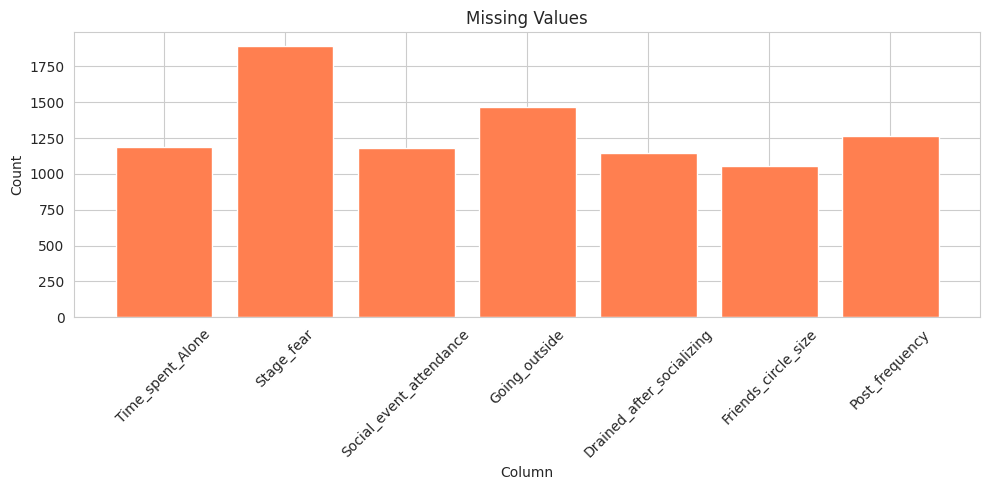

In [15]:
# Visualize missing values
missing = data.isnull().sum()
missing = missing[missing > 0]
plt.bar(missing.index, missing.values, color='coral')
plt.title('Missing Values')
plt.xlabel('Column')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Step 7: Duplicate Rows

In [16]:
# Count duplicate rows
dup_count = data.duplicated().sum()
print('Duplicate rows:', dup_count)

Duplicate rows: 0


## Step 8: Check Categorical Values

In [17]:
# Check for invalid/inconsistent values
print('Checking categorical values:')
print('\\nStage_fear:')
print(data['Stage_fear'].value_counts(dropna=False))
print('\\nDrained_after_socializing:')
print(data['Drained_after_socializing'].value_counts(dropna=False))
print('\\nPersonality:')
print(data['Personality'].value_counts(dropna=False))

Checking categorical values:
\nStage_fear:
Stage_fear
No     12609
Yes     4022
NaN     1893
Name: count, dtype: int64
\nDrained_after_socializing:
Drained_after_socializing
No     13313
Yes     4062
NaN     1149
Name: count, dtype: int64
\nPersonality:
Personality
Extrovert    13699
Introvert     4825
Name: count, dtype: int64


## Step 9: Class Imbalance Check

Class Distribution:
Personality
Extrovert    13699
Introvert     4825
Name: count, dtype: int64
\nClass Distribution (%):
Personality
Extrovert    73.95271
Introvert    26.04729
Name: proportion, dtype: float64


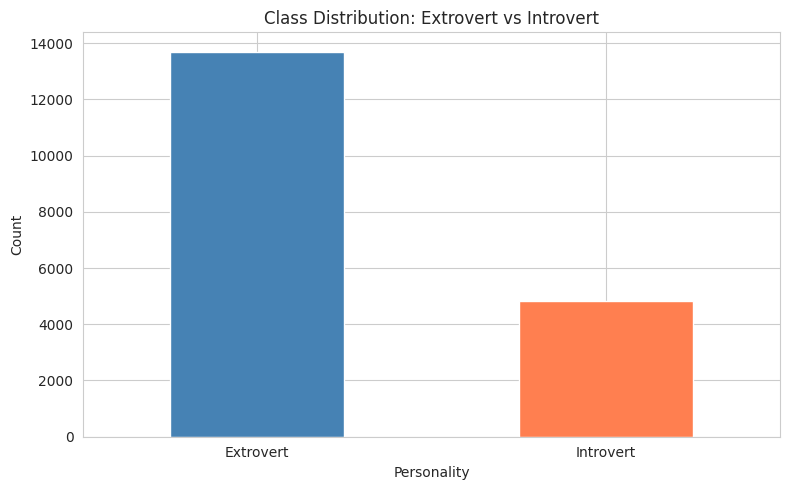

\nImbalance Ratio: 2.84:1


In [18]:
# Check class distribution
print('Class Distribution:')
print(data['Personality'].value_counts())
print('\\nClass Distribution (%):')
print(data['Personality'].value_counts(normalize=True) * 100)

# Visualize
plt.figure(figsize=(8, 5))
data['Personality'].value_counts().plot(kind='bar', color=['steelblue', 'coral'])
plt.title('Class Distribution: Extrovert vs Introvert')
plt.xlabel('Personality')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Check imbalance ratio
counts = data['Personality'].value_counts()
ratio = counts.max() / counts.min()
print(f'\\nImbalance Ratio: {ratio:.2f}:1')
if ratio > 1.5:
    print('WARNING: Dataset is imbalanced!')

## Step 10: Data Study Summary

In [19]:
print('=' * 40)
print('DATA STUDY SUMMARY')
print('=' * 40)
print('Rows:', len(data))
print('Columns:', len(data.columns))
print('Missing values:', data.isnull().sum().sum())
print('Duplicates:', data.duplicated().sum())
print('Extroverts:', len(data[data['Personality'] == 'Extrovert']))
print('Introverts:', len(data[data['Personality'] == 'Introvert']))
print('=' * 40)

DATA STUDY SUMMARY
Rows: 18524
Columns: 9
Missing values: 9196
Duplicates: 0
Extroverts: 13699
Introverts: 4825


---
# PART B: DATA CLEANING
---

## Step 11: Handle Missing Values

In [20]:
# Create copy for cleaning
clean_data = data.copy()
print('Created copy for cleaning!')

num_cols = ['Time_spent_Alone', 'Social_event_attendance',
            'Going_outside', 'Friends_circle_size', 'Post_frequency']

# Fill numerical with MEDIAN
print('\\nFilling numerical columns with MEDIAN:')
for col in num_cols:
    median = clean_data[col].median()
    before = clean_data[col].isnull().sum()
    clean_data[col] = clean_data[col].fillna(median)
    print(f'{col}: {before} -> 0 (median={median})')

Created copy for cleaning!
\nFilling numerical columns with MEDIAN:
Time_spent_Alone: 1190 -> 0 (median=2.0)
Social_event_attendance: 1180 -> 0 (median=5.0)
Going_outside: 1466 -> 0 (median=4.0)
Friends_circle_size: 1054 -> 0 (median=8.0)
Post_frequency: 1264 -> 0 (median=5.0)


In [21]:
cat_cols = ['Stage_fear', 'Drained_after_socializing']

# Fill categorical with MODE
print('Filling categorical columns with MODE:')
for col in cat_cols:
    mode = clean_data[col].mode()[0]
    before = clean_data[col].isnull().sum()
    clean_data[col] = clean_data[col].fillna(mode)
    print(f'{col}: {before} -> 0 (mode={mode})')

print('\\nMissing values after cleaning:')
print(clean_data.isnull().sum())

Filling categorical columns with MODE:
Stage_fear: 1893 -> 0 (mode=No)
Drained_after_socializing: 1149 -> 0 (mode=No)
\nMissing values after cleaning:
id                           0
Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64


## Step 12: Remove Duplicates

In [22]:
before = clean_data.duplicated().sum()
clean_data = clean_data.drop_duplicates().reset_index(drop=True)
after = clean_data.duplicated().sum()
print('Duplicates before:', before)
print('Duplicates after:', after)
print('Index reset: Yes')

Duplicates before: 0
Duplicates after: 0
Index reset: Yes


## Step 13: Drop ID Column

In [23]:
print('Dropping id column...')
clean_data = clean_data.drop('id', axis=1)
print('Columns:', clean_data.columns.tolist())

Dropping id column...
Columns: ['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance', 'Going_outside', 'Drained_after_socializing', 'Friends_circle_size', 'Post_frequency', 'Personality']


## Step 14: Verify Data Ranges

In [24]:
print('Verifying data ranges:')
for col in num_cols:
    print(f'{col}: {clean_data[col].min()} to {clean_data[col].max()}')

Verifying data ranges:
Time_spent_Alone: 0.0 to 11.0
Social_event_attendance: 0.0 to 10.0
Going_outside: 0.0 to 7.0
Friends_circle_size: 0.0 to 15.0
Post_frequency: 0.0 to 10.0


## Step 15: Check Outliers

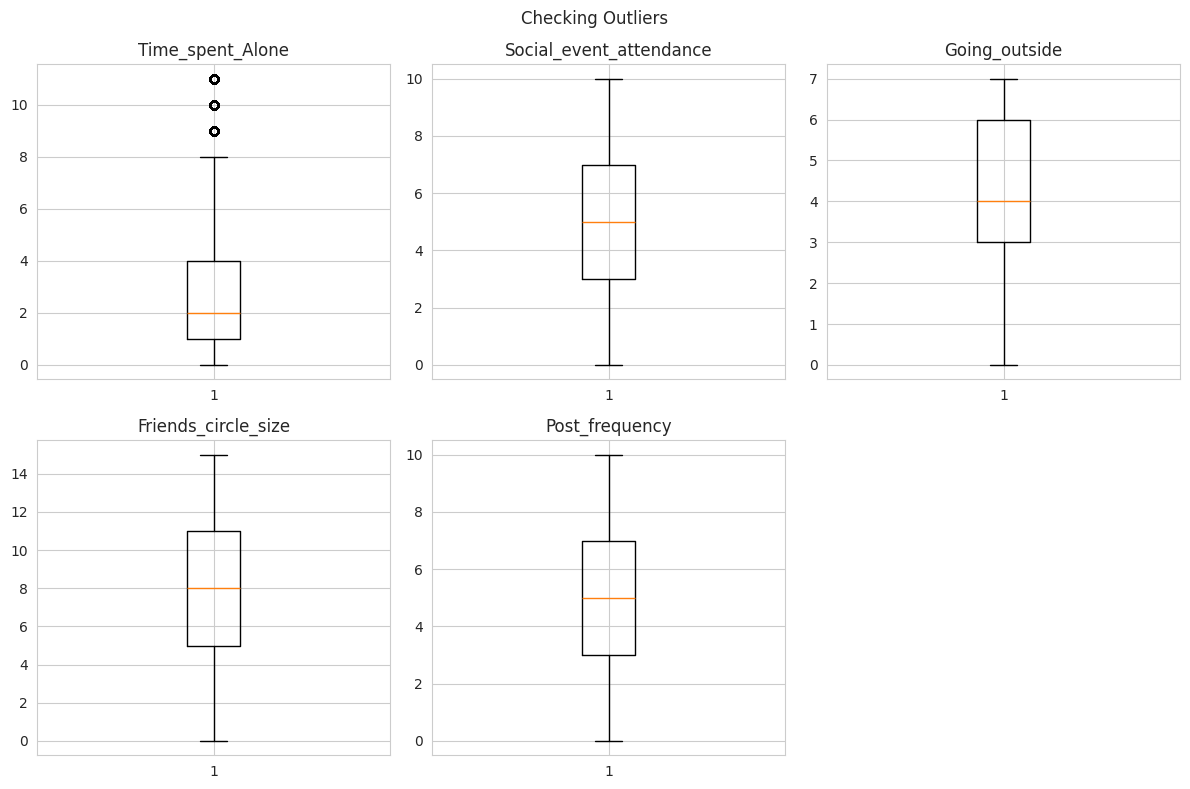

In [25]:
# Box plots for outliers
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()
for i in range(len(num_cols)):
    axes[i].boxplot(clean_data[num_cols[i]])
    axes[i].set_title(num_cols[i])
axes[5].axis('off')
plt.suptitle('Checking Outliers')
plt.tight_layout()
plt.show()

## Step 16: Final Cleaned Data

In [26]:
print('Cleaned data:')
clean_data.head()

Cleaned data:


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,6.0,Yes,1.0,0.0,No,3.0,0.0,Introvert
3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,1.0,No,4.0,4.0,No,13.0,5.0,Extrovert


In [27]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           18524 non-null  float64
 1   Stage_fear                 18524 non-null  object 
 2   Social_event_attendance    18524 non-null  float64
 3   Going_outside              18524 non-null  float64
 4   Drained_after_socializing  18524 non-null  object 
 5   Friends_circle_size        18524 non-null  float64
 6   Post_frequency             18524 non-null  float64
 7   Personality                18524 non-null  object 
dtypes: float64(5), object(3)
memory usage: 1.1+ MB


In [28]:
print('=' * 40)
print('CLEANING SUMMARY')
print('=' * 40)
print('BEFORE:')
print('  Rows:', len(data))
print('  Columns:', len(data.columns))
print('  Missing:', data.isnull().sum().sum())
print('AFTER:')
print('  Rows:', len(clean_data))
print('  Columns:', len(clean_data.columns), '(dropped id)')
print('  Missing:', clean_data.isnull().sum().sum())
print('=' * 40)
print('DATA IS CLEAN!')

CLEANING SUMMARY
BEFORE:
  Rows: 18524
  Columns: 9
  Missing: 9196
AFTER:
  Rows: 18524
  Columns: 8 (dropped id)
  Missing: 0
DATA IS CLEAN!


## Step 17: Save Cleaned Data

In [29]:
# Uncomment to save to Google Drive
# clean_data.to_csv(DATA_PATH + 'cleaned_data.csv', index=False)
# print('Saved to Google Drive!')

---
# PART C: DATA VISUALIZATION
---

## Step 18: Time Spent Alone

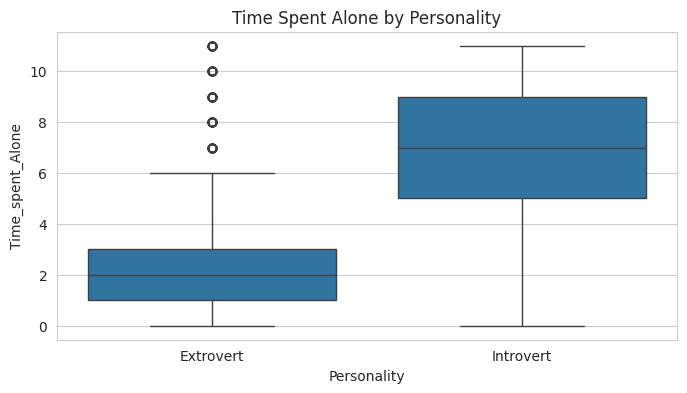

In [30]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='Personality', y='Time_spent_Alone', data=clean_data)
plt.title('Time Spent Alone by Personality')
plt.show()

# INSIGHT: Introverts spend MORE time alone (median ~5-6 hours)
# Extroverts spend LESS time alone (median ~1-2 hours)
# This is a STRONG indicator of personality type

## Step 19: Social Event Attendance

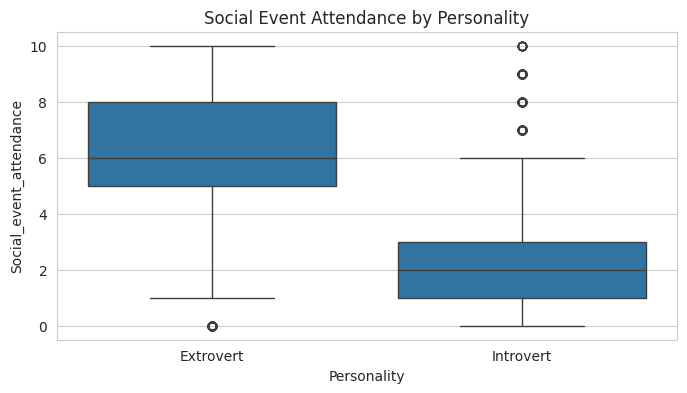

In [31]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='Personality', y='Social_event_attendance', data=clean_data)
plt.title('Social Event Attendance by Personality')
plt.show()

# INSIGHT: Extroverts attend MORE social events (median ~7)
# Introverts attend FEWER social events (median ~2)

## Step 20: Going Outside Frequency

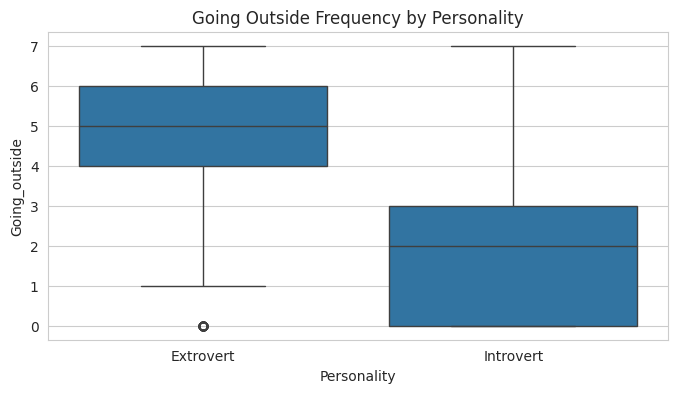

In [32]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='Personality', y='Going_outside', data=clean_data)
plt.title('Going Outside Frequency by Personality')
plt.show()

# INSIGHT: Extroverts go outside MORE often (median ~5)
# Introverts go outside LESS often (median ~1-2)

## Step 21: Friends Circle Size

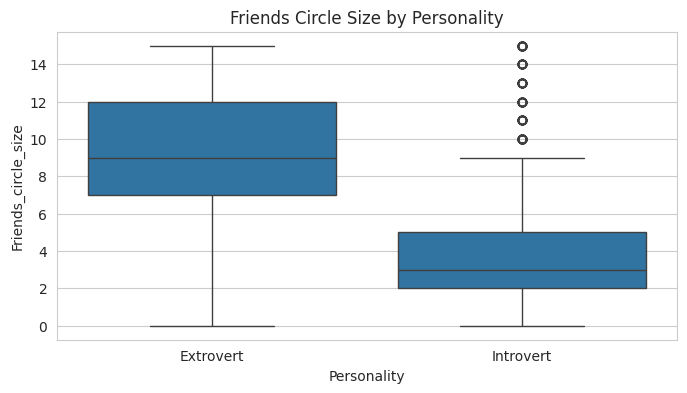

In [33]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='Personality', y='Friends_circle_size', data=clean_data)
plt.title('Friends Circle Size by Personality')
plt.show()

# INSIGHT: Extroverts have MORE friends (median ~10-11)
# Introverts have FEWER friends (median ~3-4)

## Step 22: Social Media Post Frequency

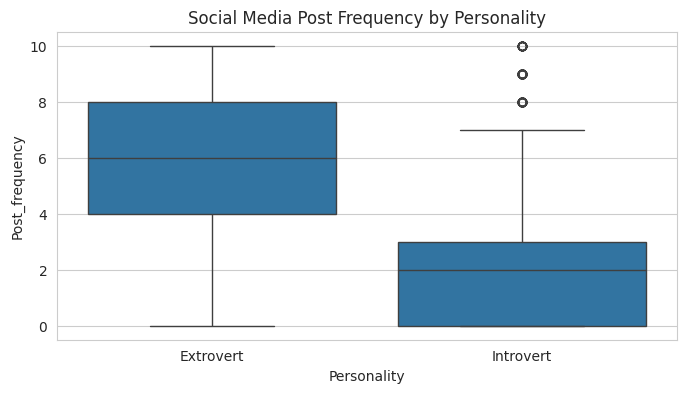

In [34]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='Personality', y='Post_frequency', data=clean_data)
plt.title('Social Media Post Frequency by Personality')
plt.show()

# INSIGHT: Extroverts post MORE on social media (median ~6-7)
# Introverts post LESS (median ~2-3)

## Step 23: Stage Fear

<Figure size 800x400 with 0 Axes>

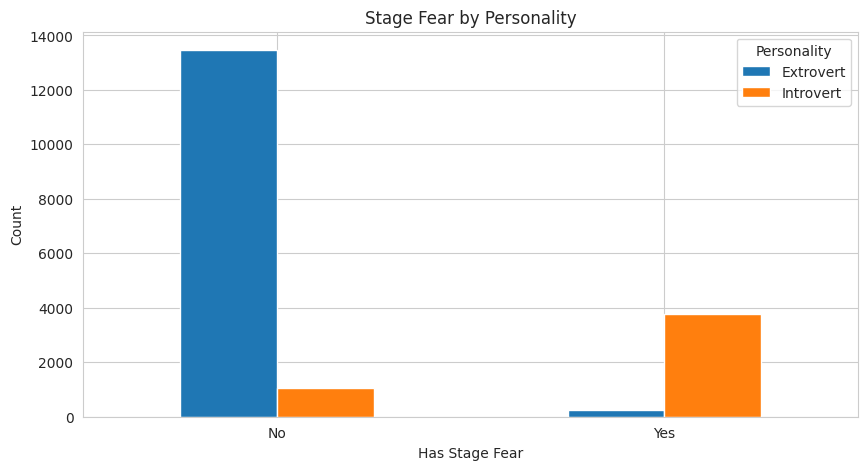

In [35]:
plt.figure(figsize=(8, 4))
pd.crosstab(clean_data['Stage_fear'], clean_data['Personality']).plot(kind='bar')
plt.title('Stage Fear by Personality')
plt.xlabel('Has Stage Fear')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Personality')
plt.show()

# INSIGHT: Most Extroverts say NO to stage fear
# Most Introverts say YES to stage fear

## Step 24: Drained After Socializing

<Figure size 800x400 with 0 Axes>

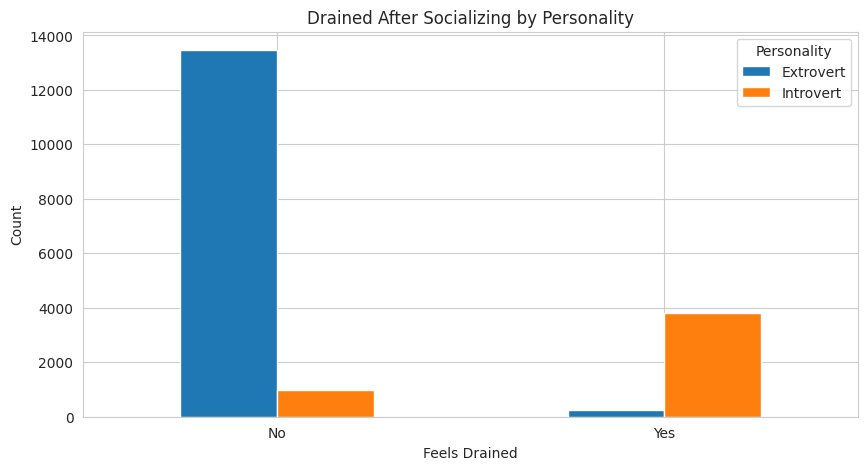

In [36]:
plt.figure(figsize=(8, 4))
pd.crosstab(clean_data['Drained_after_socializing'], clean_data['Personality']).plot(kind='bar')
plt.title('Drained After Socializing by Personality')
plt.xlabel('Feels Drained')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Personality')
plt.show()

# INSIGHT: Extroverts mostly say NO - they get energy from socializing
# Introverts mostly say YES - socializing drains their energy

## Step 25: Correlation Heatmap

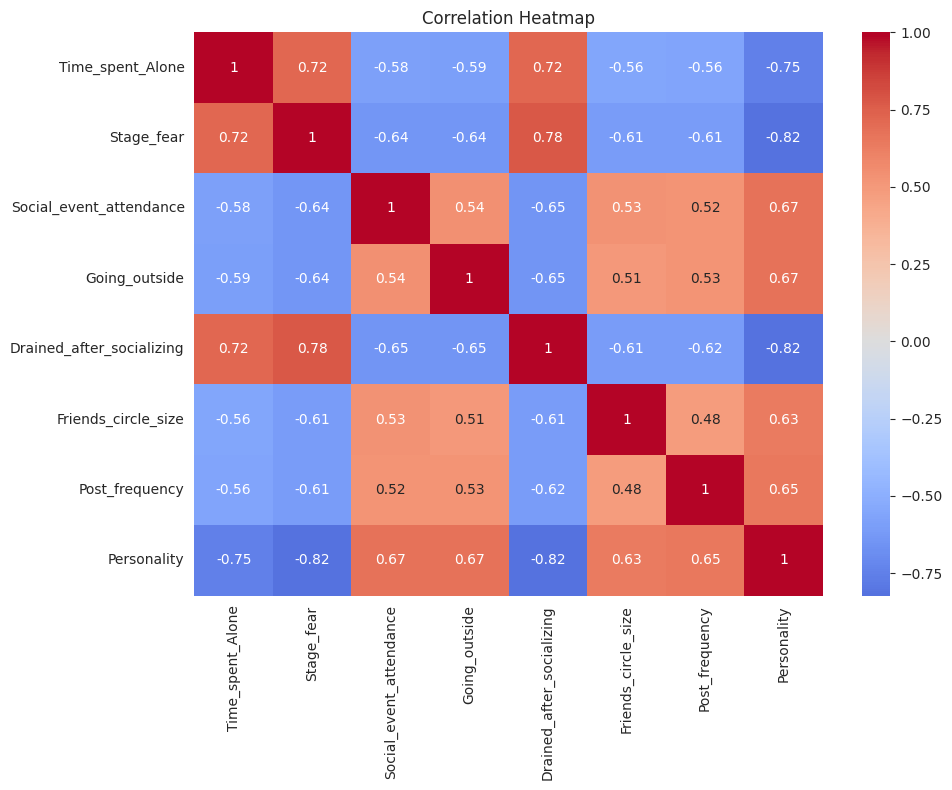

In [37]:
# Encode categorical for correlation
data_encoded = clean_data.copy()
data_encoded['Stage_fear'] = data_encoded['Stage_fear'].map({'Yes': 1, 'No': 0})
data_encoded['Drained_after_socializing'] = data_encoded['Drained_after_socializing'].map({'Yes': 1, 'No': 0})
data_encoded['Personality'] = data_encoded['Personality'].map({'Extrovert': 1, 'Introvert': 0})

plt.figure(figsize=(10, 8))
sns.heatmap(data_encoded.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

# INSIGHT: Features POSITIVELY correlated with Extrovert:
#   - Social_event_attendance, Going_outside, Friends_circle_size, Post_frequency
# Features NEGATIVELY correlated (means Introvert):
#   - Time_spent_Alone, Stage_fear, Drained_after_socializing

## Step 26: All Features Comparison

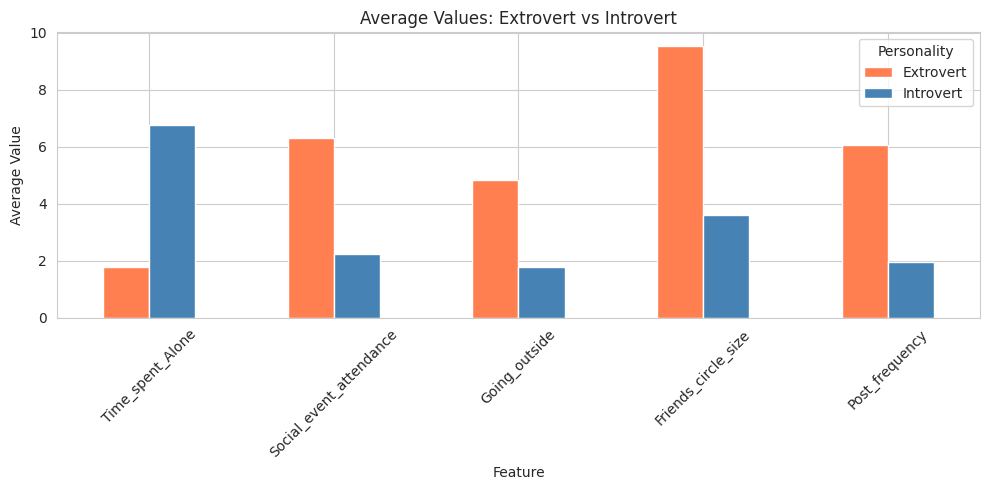

In [38]:
means = clean_data.groupby('Personality')[num_cols].mean()
means.T.plot(kind='bar', figsize=(10, 5), color=['coral', 'steelblue'])
plt.title('Average Values: Extrovert vs Introvert')
plt.xlabel('Feature')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.legend(title='Personality')
plt.tight_layout()
plt.show()

# INSIGHT: Clear pattern visible
# Introverts: High time alone, low everything else
# Extroverts: Low time alone, high everything else

---
## Visualization Insights Summary

**Extroverts tend to:**
- Spend less time alone
- Attend more social events
- Go outside more often
- Have larger friend circles
- Post more on social media
- NOT have stage fear
- NOT feel drained after socializing

**Introverts tend to:**
- Spend more time alone
- Attend fewer social events
- Go outside less often
- Have smaller friend circles
- Post less on social media
- Have stage fear
- Feel drained after socializing

**Best Predictor Features:**
1. Time_spent_Alone (strongest)
2. Social_event_attendance
3. Stage_fear
4. Drained_after_socializing

### Next: Model Building